<a href="https://colab.research.google.com/github/chingyaousf/DM-project-Cardiovascular-Disease-prediction/blob/main/cardio_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn 

In [ ]:
import numpy as np
import pandas as pd
import sklearn 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cardio_train.csv", delimiter=";")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
features = ["age" ,"gender" ,"height" ,"weight" ,"ap_hi" ,"ap_lo" ,"cholesterol" ,"gluc" ,"smoke" ,"alco" ,"active"]
x = data[features] #feature variable
y = data["cardio"] #target variable

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,16136,2,169,71.0,100,80,1,1,1,0,1
34858,14615,1,158,69.0,140,80,2,1,0,0,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1
59230,16720,1,153,53.0,100,60,1,1,0,0,1
1730,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# apply label encoding to all categorical columns in the training set
for col in x_train.select_dtypes(include=['object']):
    x_train[col] = le.fit_transform(x_train[col])

# apply label encoding to all categorical columns in the test set
for col in x_test.select_dtypes(include=['object']):
    x_test[col] = le.fit_transform(x_test[col])


In [ ]:
# fit the decision tree model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predict on the test set
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6319047619047619


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7152380952380952


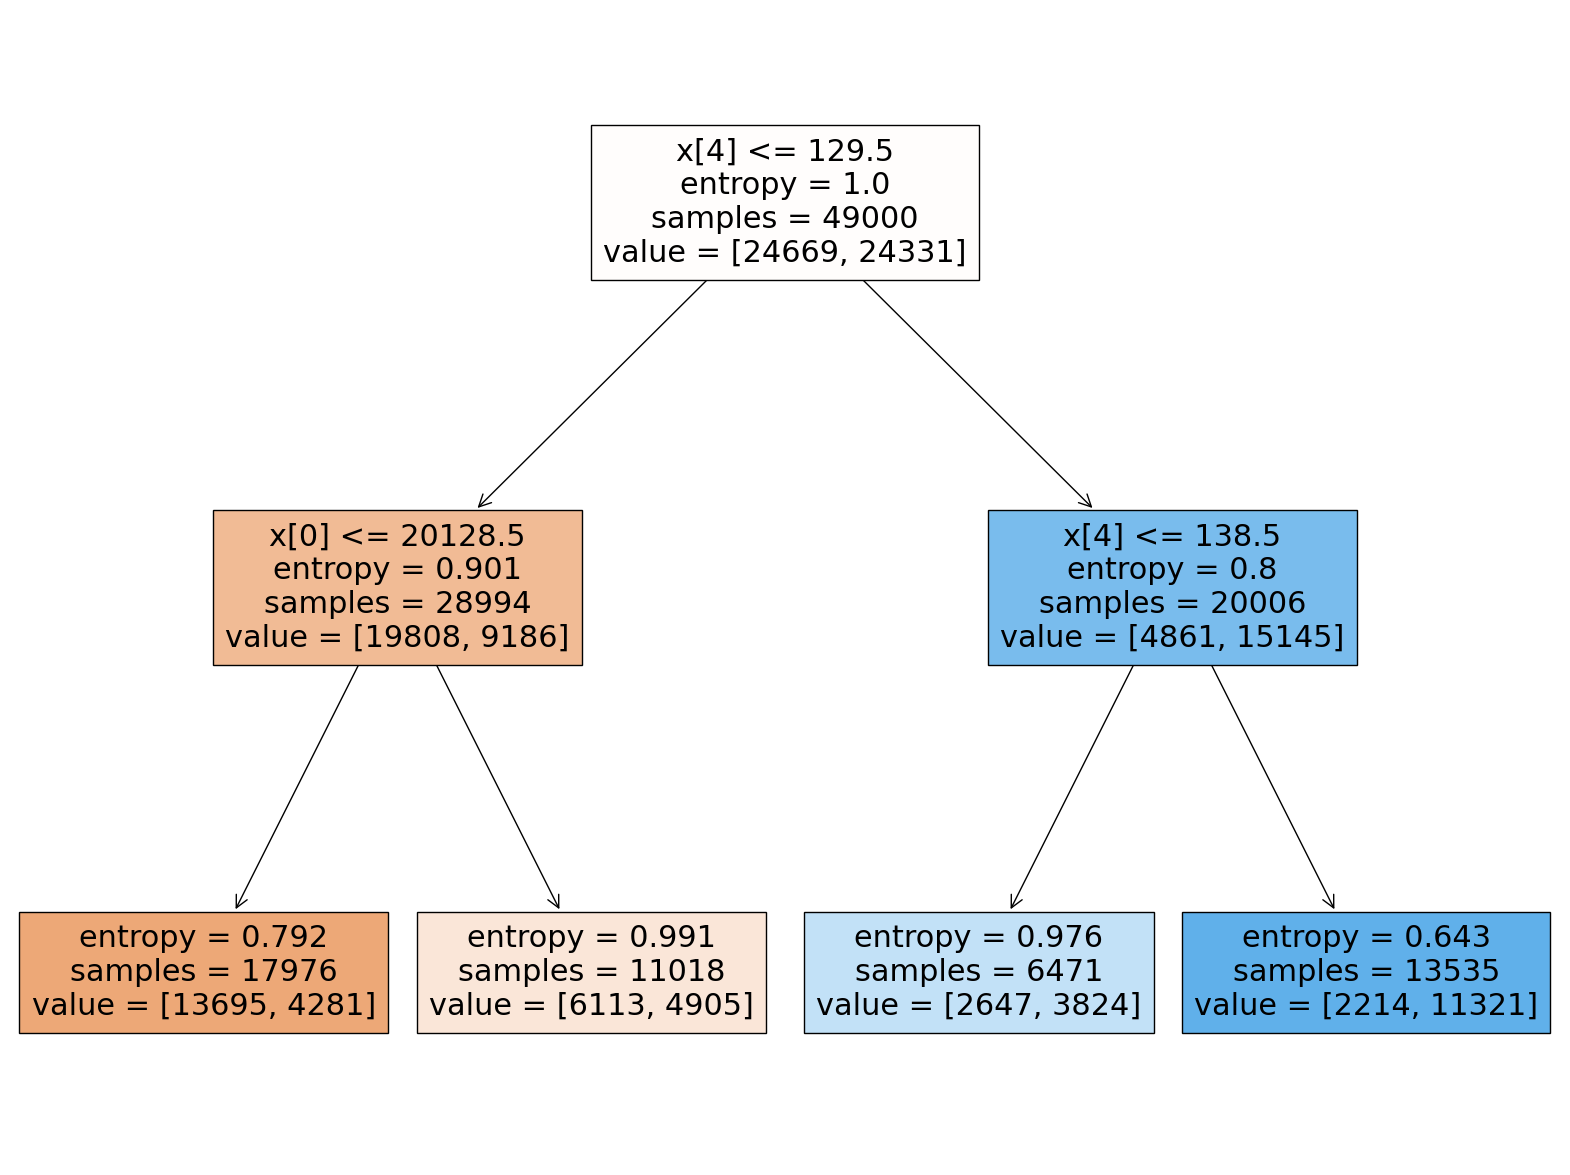

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clf,filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=3,criterion="entropy" ,random_state=0)

In [ ]:
clf = clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7256666666666667
Confusion [[8383 1969]
 [3792 6856]]


In [ ]:
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))

Precision: 0.7327129735735352
Recall: 0.7268359965139922
F1_score: 0.7242084554595015


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7256666666666667


In [ ]:
from keras.utils import to_categorical

In [ ]:
# create an instance of LabelEncoder
le = LabelEncoder()

# encode y_train and y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# fit the model on the training data
clf.fit(x_train, y_train_encoded)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# compute the AUC score
print("auc:", metrics.roc_auc_score(to_categorical(y_test_encoded), clf.predict_proba(x_test), average='macro', multi_class='ovo'))

auc: 0.7942592150008652


In [ ]:
print("auc:", metrics.roc_auc_score(y_test, clf.predict_proba(x_test), average='macro', multi_class='ovo'))

ValueError: ignored

In [ ]:
to_categorical(y_test_encoded).shape #(n_samples, n_classes)

(21000, 2)

In [ ]:
class_of_interest =1
class_id =1

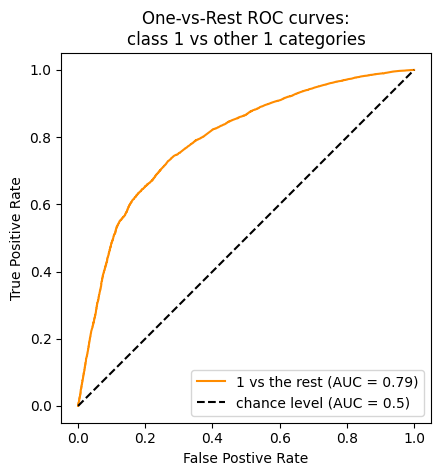

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    to_categorical(y_test_encoded)[:, class_id],
    clf.predict_proba(x_test)[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nclass 1 vs other 1 categories")
plt.legend()
plt.show()


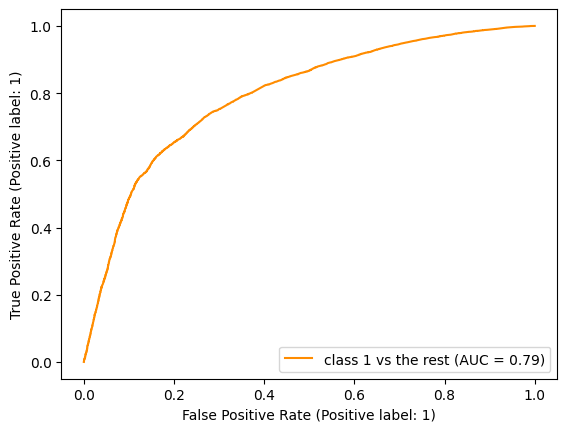

In [ ]:
class_id = 1  # select class 1 (0-indexed) to plot against the rest
RocCurveDisplay.from_predictions(
    to_categorical(y_test_encoded)[:, class_id],
    clf.predict_proba(x_test)[:, class_id],
    name=f"class {class_id} vs the rest",
    color="darkorange",
)


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
import sklearn.metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))
print("all:", metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))

Accuracy: 0.581047619047619
Precision: 0.6417763301193841
Recall: 0.5855052780735684
F1_score: 0.5371387493676298
all: (0.6417763301193841, 0.5855052780735684, 0.5371387493676298, None)


Let's train a neural networ

In [ ]:
from sklearn.neural_network import MLPClassifier

Next, we create the classffier and train MLP on training set

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=200, solver='sgd')
clf.fit(x_train, y_train)
clf.predict_proba(x_test)

array([[0.50344869, 0.49655131],
       [0.50344869, 0.49655131],
       [0.50344869, 0.49655131],
       ...,
       [0.50344869, 0.49655131],
       [0.50344869, 0.49655131],
       [0.50344869, 0.49655131]])

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
import sklearn.metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))
print("all:", metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))

Accuracy: 0.492952380952381
Precision: 0.2464761904761905
Recall: 0.5
F1_score: 0.33018627200816536
all: (0.2464761904761905, 0.5, 0.33018627200816536, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's practice the same in a deep learning library TensorFlow. We don't want run our model on GPU in this exercise

In [ ]:
import tensorflow as tf
print(tf.__version__) #check thye version of tensorFlow you are using
print(tf.config.list_physical_devices('GPU')) #optional

2.12.0
[]


Next, we need to build our neural network model using Keras API in tensorFlow

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(11)))
model.add(tf.keras.layers.Dense(units=2,activation=tf.nn.softmax))

In [ ]:
#Correlation
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [ ]:
data.shape

(70000, 13)

In [ ]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#Decribing the whole Datset
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Showing the Number of 0 and 1's, 1(Cardiovascular)
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

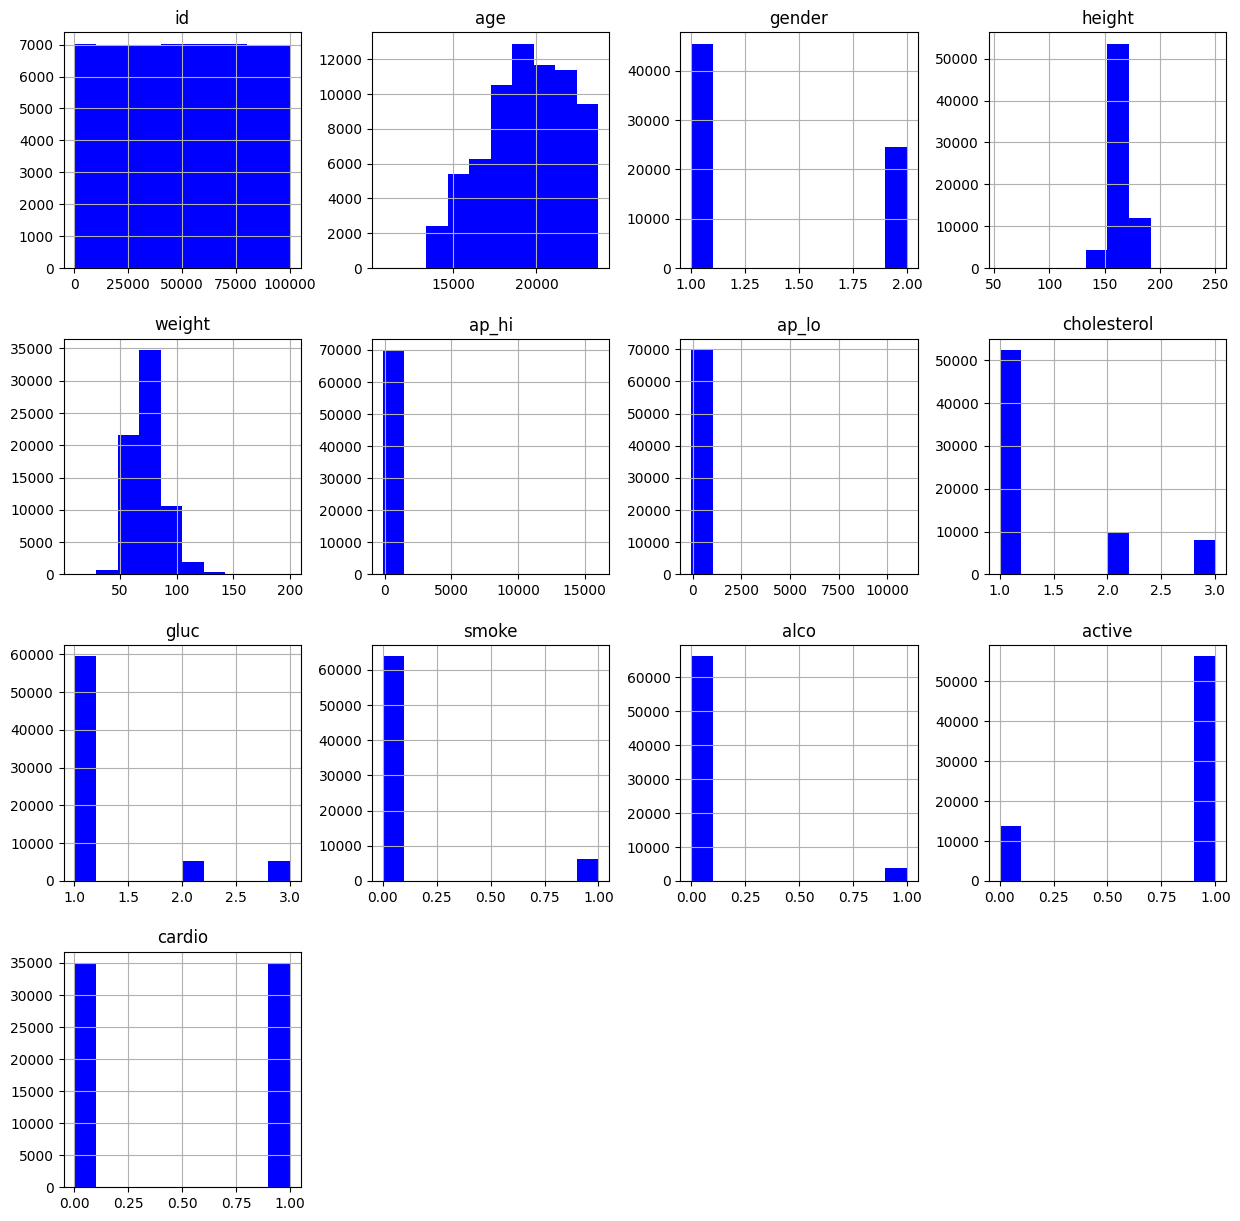

In [ ]:
#Plotting the Dataset
data.hist(figsize = (15, 15),color = 'blue')
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to data being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [ ]:
#Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to data being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
 

SyntaxError: ignored

<ipython-input-66-2ac8b45039b1>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data = data.dropna('columns')


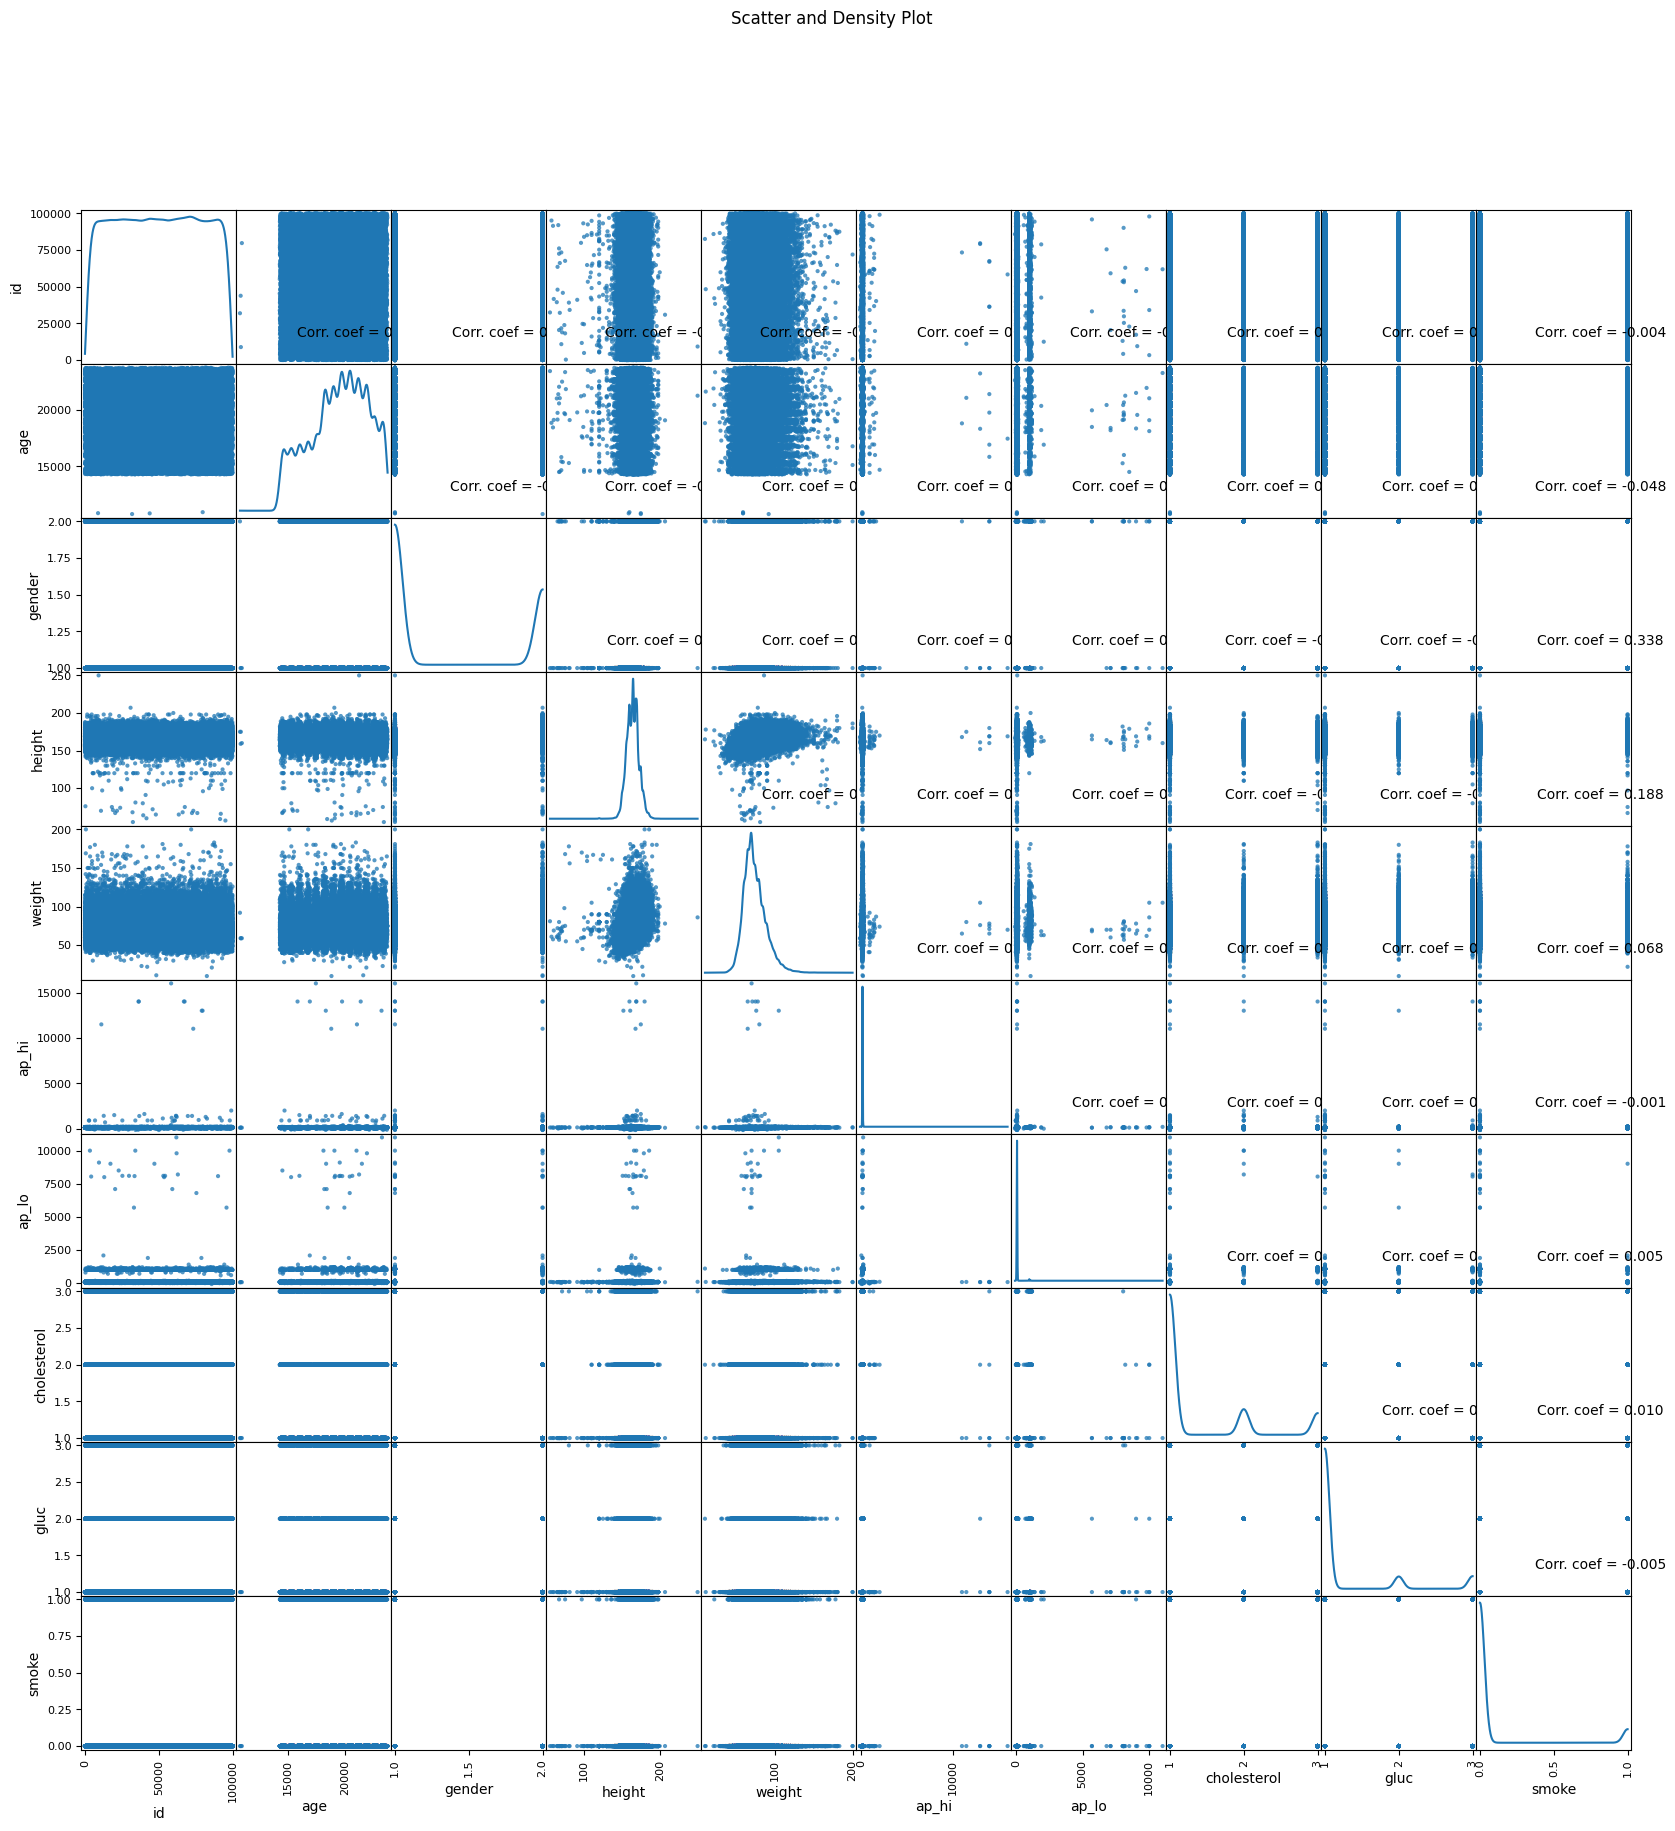

In [ ]:
plotScatterMatrix(data, 20, 10)

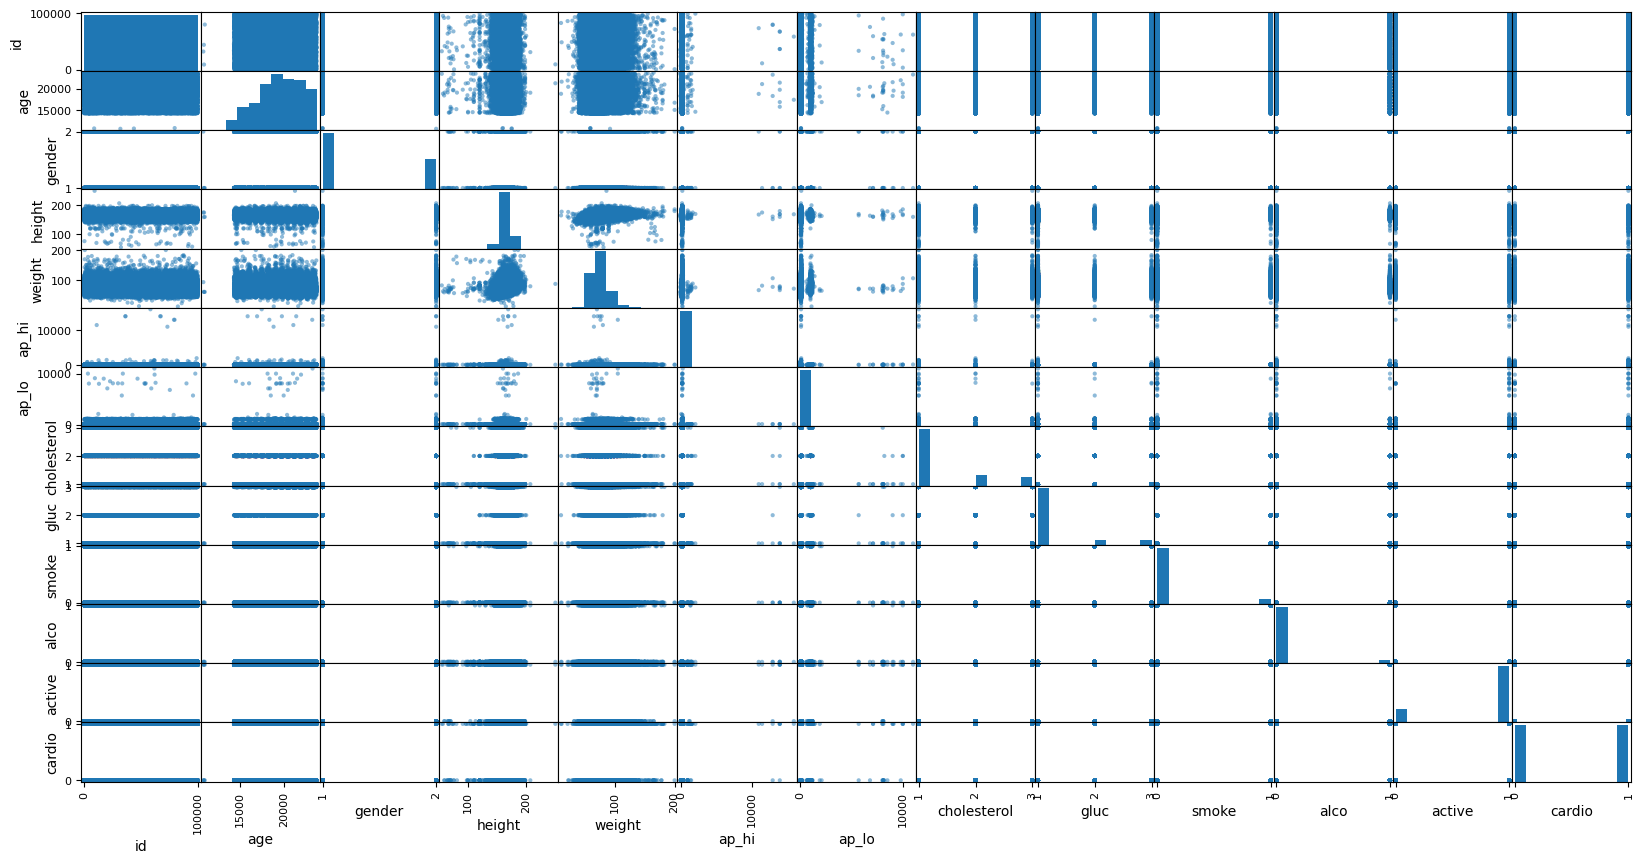

In [ ]:
#Scattering the Plots
scatter_matrix(data, figsize = (20, 10))
plt.show()

In [ ]:
#Correlation
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [ ]:
import seaborn as sns

<Axes: >

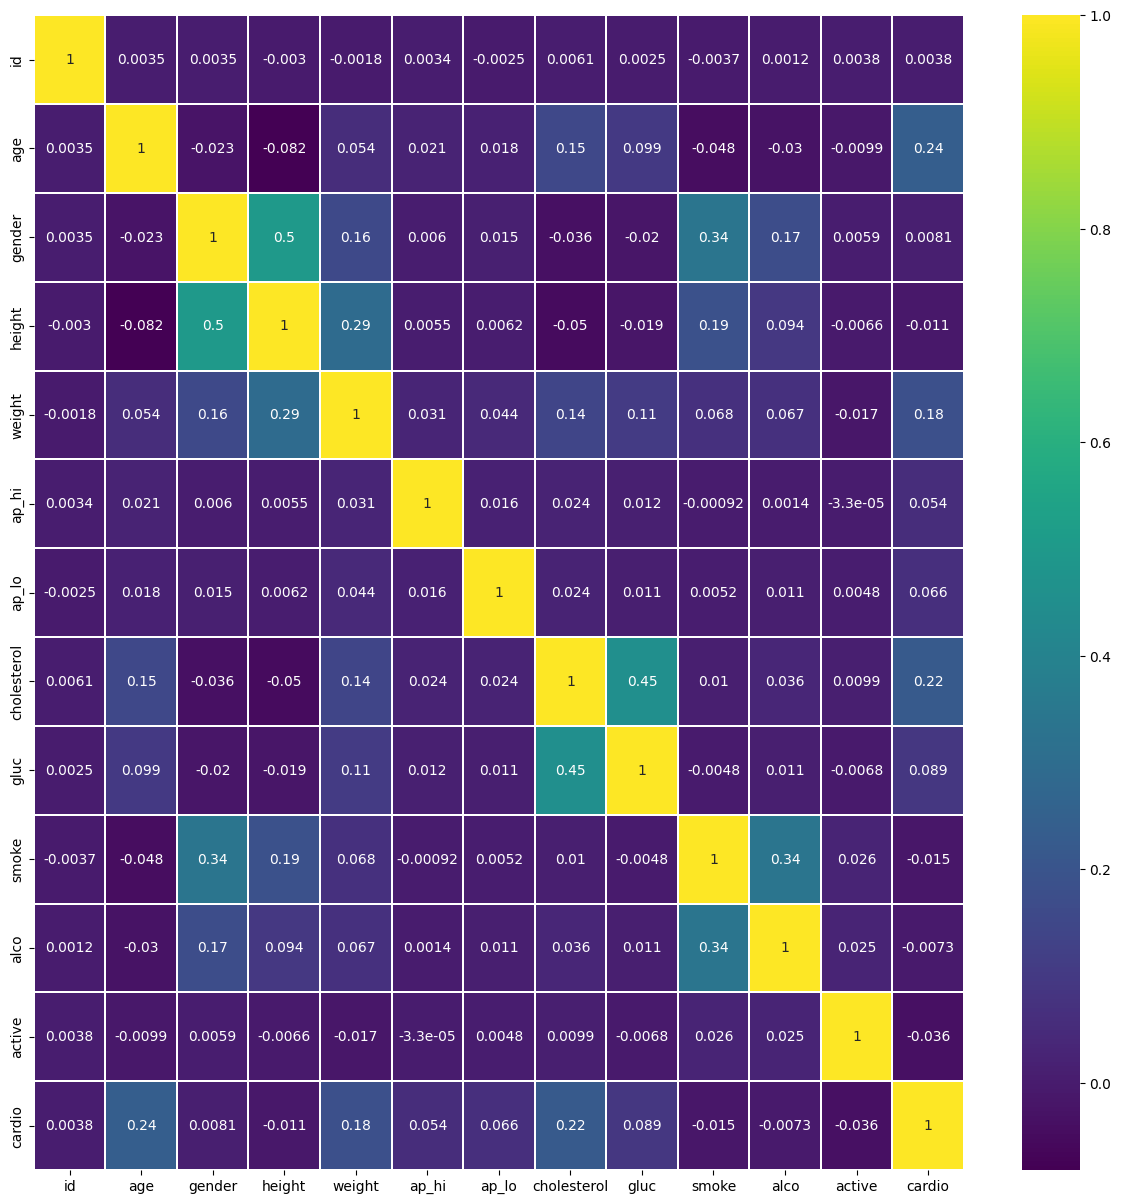

In [ ]:
#Correlation Matrix Visualization
corrmat = data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')